# <center>4. Композиція моделей та оцінка інформативності ознак</center>
## <center>4.1 Паралельна композиція моделей</center>

Спочатку налаштуємо доступ до даних на google drive (якщо ви відкриваєте блокнот в google colab, а не на PC) шляхом монтування google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


Перевіримо шлях до папки з матеріалами лаборатоної роботи на google drive. Якщо у вас шлях відрізняється то відредагуйте

In [2]:
!ls gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_4

data				      lec_4.1_bagging_ua.ipynb
data_science_04102022_part_2_eng.mp4  lec_4.1_bagging_ua.pdf
data_science_26092022_part_1_eng.mp4  lec_4.2_boosting_eng.ipynb
img				      lec_4.2_boosting_eng.pdf
lec_4.1_bagging_eng.ipynb	      lec_4.2_boosting_ua.ipynb
lec_4.1_bagging_eng.pdf		      lec_4.2_boosting_ua.pdf


Перемістимо матеріали лабораторної роботи з google drive на віртуальну машину google colab

In [3]:
!cp -a gdrive/MyDrive/TEACHING/IntroDataScience/intro_to_data_science/Lec_topic_4/. .
!ls

data				      lec_4.1_bagging_ua.ipynb
data_science_04102022_part_2_eng.mp4  lec_4.1_bagging_ua.pdf
data_science_26092022_part_1_eng.mp4  lec_4.2_boosting_eng.ipynb
gdrive				      lec_4.2_boosting_eng.pdf
img				      lec_4.2_boosting_ua.ipynb
lec_4.1_bagging_eng.ipynb	      lec_4.2_boosting_ua.pdf
lec_4.1_bagging_eng.pdf		      sample_data


З минулих лекцій ви вже дізналися про різні алгоритми класифікації, а також навчилися правильно здійснювати валідацію і оцінювання якості моделей. Але що робити, якщо ви вже знайшли кращу модель і підвищити точність моделі більше не можете? У такому випадку потрібно застосувати більш просунуті техніки машинного навчання, які можна об'єднати словом «ансамблі». Ансамбль - це якась сукупність, частини якої утворюють єдине ціле. В повсякденному житті ви знаєте музичні ансамблі, де об'єднані кілька музичних інструментів, архітектурні ансамблі з різними будівлями і т.д.

### Ансамблі

Хорошим прикладом ансамблів вважається теорема Кондорсе «про журі присяжних» (1784). Якщо кожен член журі присяжних має незалежну думку, і якщо ймовірність правильного рішення члена журі більше 0.5, то тоді ймовірність правильного рішення присяжних в цілому зростає зі збільшенням кількості членів журі і прагне до одиниці. Якщо ж ймовірність бути правим у кожного з членів журі менше 0.5, то ймовірність прийняття правильного рішення присяжними в цілому монотонно зменшується і прямує до нуля зі збільшенням кількості присяжних.
- $\large N $ — кількість присяжних
- $\large p $ — ймовірність правильного рішення присяжного
- $\large \mu $ — ймовірність правильного рішення всього жюрі
- $\large m $ — мінімальна більшість членів жюрі, $ m = floor(N/2) + 1 $
- $\large C_N^i$ — число [сполучень](https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%B1%D1%96%D0%BD%D0%B0%D1%86%D1%96%D1%8F_(%D0%BA%D0%BE%D0%BC%D0%B1%D1%96%D0%BD%D0%B0%D1%82%D0%BE%D1%80%D0%B8%D0%BA%D0%B0)) из $N$ по $i$
$$ \large \mu = \sum_{i=m}^{N}C_N^ip^i(1-p)^{N-i} $$
Якщо $\large p > 0 $, то $\large \mu > p $
Якщо $\large N \rightarrow \infty $, то $\large \mu \rightarrow 1 $
Давайте розглянемо ще один приклад ансамблів - "Мудрість натовпу". Френсіс Гальтон в 1906 році відвідав ринок, де проводилася якась лотерея для селян.
Їх зібралося близько 800 чоловік і вони намагалися вгадати вагу бика, який стояв перед ними. Його вага становила 1198 фунтів. Жоден селянин не вгадав точну вагу бика, але якщо порахувати середнє від їх прогнозів, то отримаємо 1197 фунтів.
Цю ідею зменшення помилки застосували і в машинному навчанні.


### Бутстреп

Bagging (від Bootstrap aggregation) — це один з перших і найбільш простих видів ансамблів. Він був винайдений Лео Брейманом в 1994 году. Бегінг оснований на статистичному методі бутстрепінга, який дозволяє оцінювати багато статистик складних моделей.

Метод бутстрепа полягає у наступному. Нехай є вибірка $\large X$ з розміром $\large N$. Візьмемо рівномірно з вибірки $\large N$ об'єктів з поверненням. Це означає, що ми будемо $\large N$ разів вибирати довільний об'єкт вибірки (вважаємо, що кожен об'єкт «вибирається» з однаковою ймовірністю $\large \frac{1}{N}$), причому кожен раз ми вибираємо з усього початкового набору даних $\large N$ об'єктів. Можна уявити собі мішок, з якого дістають кульки: обрана на якомусь кроці кулька повертається назад в мішок, і наступний вибір знову робиться рівноймовірно з тієї ж кількості кульок. Відмітимо, що із-за повернення серед них виявляться повторення. Позначимо нову вибірку через $\large X_1$. Повторюючи процедуру $\large M$ разів, згенеруємо $\large M$ підвибірок $\large X_1, \dots, X_M$. Тепер ми маємо достатньо велику кількість вибірок і можемо оцінювати різноманітні  статистики початкового розподілу.




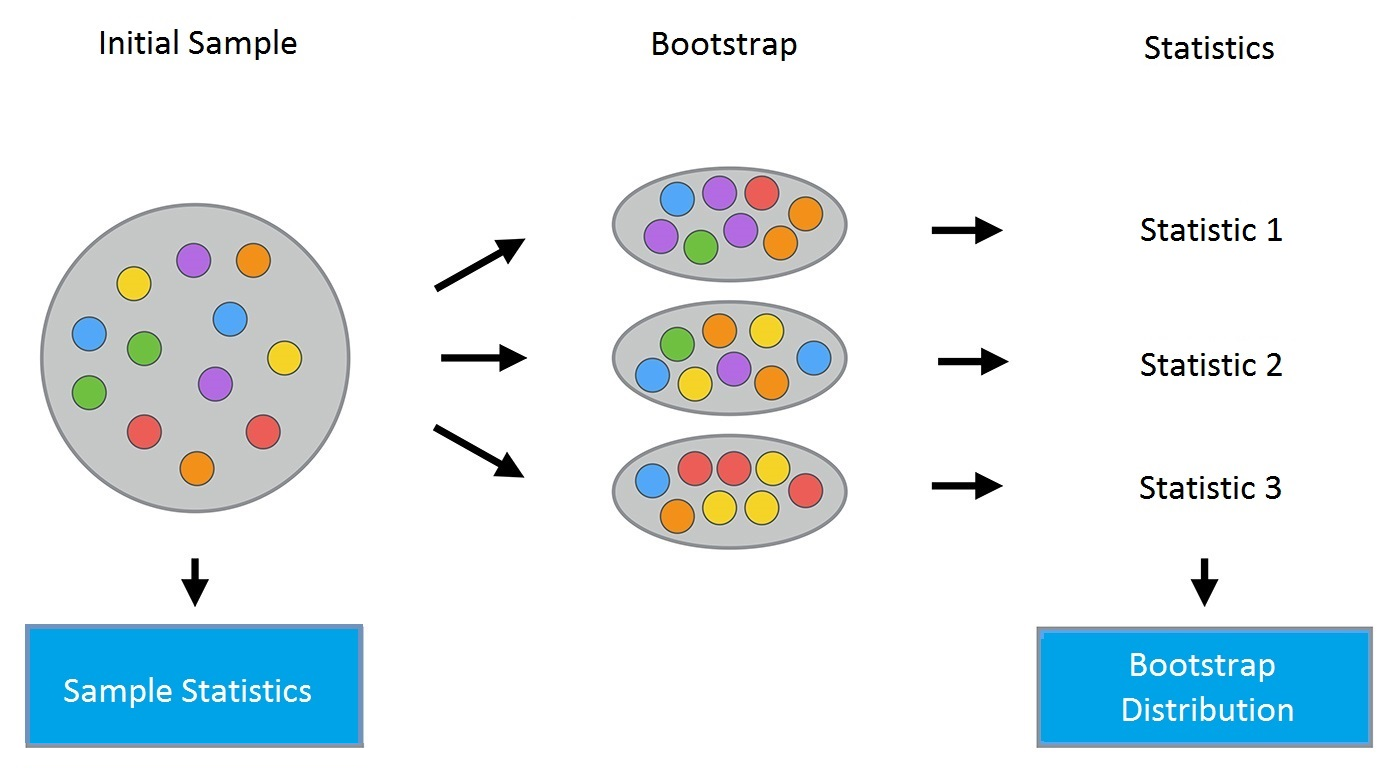

In [ ]:
from IPython.display import Image
Image('img/bootstrap.png', width=640, height=480)

Давайте для прикладу візьмемо вам вже відомий датасет `telecom_churn` з минулих занять. Нагадаємо, що це завдання бінарної класифікації відтоку клієнтів. Одним з найважливіших ознак в цьому датасеті є кількість дзвінків в сервісний центр, які були зроблені клієнтом. Давайте спробуємо візулізувати дані і подивитися на розподіл даної ознаки.

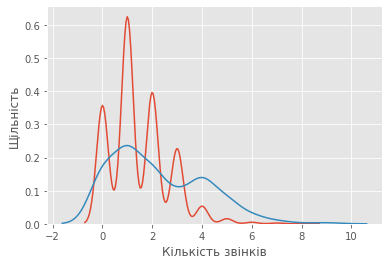

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

telecom_data = pd.read_csv('data/telecom_churn.csv')

fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Кількість звінків', ylabel='Щільність')    
plt.show()

Як ви вже могли помітити, кількість дзвінків в сервісний центр у лояльних клієнтів менше, ніж у колишніх клієнтів. Тепер було б добре оцінити скільки в середньому робить дзвінків кожна з груп. Оскільки даних в нашому датасеті мало, то шукати середнє не зовсім правильно, краще застосувати наші нові знання бутстрепу. Давайте згенеруємо 1000 нових підвибірок з нашої генеральної сукупності і зробимо інтервальну оцінку середнього.

In [ ]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функція для генерації підвибірок за допомогою бутстрепу
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
    
def stat_intervals(stat, alpha):
    # функція для інтервальної оцінки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# збереження в окремі numpy масиви даних про лояльних і вже колишніх клієнтів
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

# ставимо seed для відтворюваності результатів
np.random.seed(0)

# генеруємо вибірки за допомогою бутстрепа і відразу рахуємо для кожної з них середнє
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

#  виводимо інтервальну оцінку середнього
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal:  mean interval [1.4077193  1.49473684]
Service calls from churn:  mean interval [2.0621118  2.39761905]


У підсумку ми отримали, що з 95% ймовірністю середнє число дзвінків від лояльних клієнтів буде лежати в проміжку між 1.40 і 1.50, в той час як наші колишні клієнти телефонували в середньому від 2.06 до 2.40 раз. Також ще можна звернути увагу, що інтервал для лояльних клієнтів вужчий, що досить логічно, оскільки вони дзвонять рідко (в основному 0, 1 або 2 рази), а незадоволені клієнти будуть дзвонити набагато частіше, але з часом їх терпіння закінчиться, і вони змінять оператора.

### Бегінг

Теперь ви маєте уявлення про бутстреп, і ми можемо перейти безпосередньо до бегінгу. Нехай дано навчальну вибірку $\large X$. За допомогою бутстрепу згенеруємо з неї вибірки $\large X_1, \dots, X_M$. Тепер на кожній вибірці навчимо свій класифікатор $\large a_i(x)$. Результуючий класифікатор буде усереднювати відповіді всіх цих алгоритмів (у випадку класифікації це відповідає голосуванню): $\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$. Цю схему можна представити картинкою нижче.



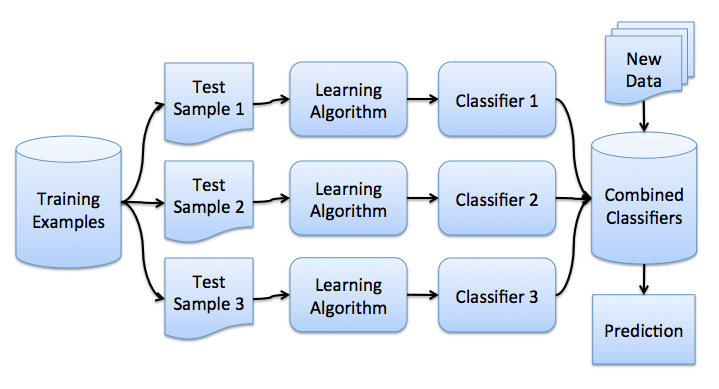

In [ ]:
from IPython.display import Image
Image('img/bagging.png', width=640, height=480)

Розгялнемо задачу регресії з базовими алгоритмами $\large b_1(x), \dots , b_n(x)$. Припутимо, що існує істинна функція відповіді для всіх об'єктів $\large y(x)$, а також задано розподіл на об'єктах $\large p(x)$. В цьому випадку ми можемо записати помилку кожної функції регресії $$ \large \varepsilon_i(x) = b_i(x) − y(x),  i = 1, \dots, n$$
і записати маточікування середньоквадратичної помилки $$ \large E_x(b_i(x) − y(x))^{2} = E_x \varepsilon_i (x). $$

Середня помилка побудованих функцій регресії має вид $$ \large E_1 = \frac{1}{n}E_x \sum_{i=1}^n \varepsilon_i^{2}(x) $$

Припустимо, що помилки незміщені і некорельовані: 

$$ \large \begin{array}{rcl} E_x\varepsilon_i(x) &=& 0, \\
E_x\varepsilon_i(x)\varepsilon_j(x) &=& 0, i \neq j. \end{array}$$

Побудуємо нову функцію регресії, яка буде усереднювати відповіді побудованих нами функцій:
$$ \large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x) $$

Знайдемо її середньоквадратичну помилку:

$$ \large \begin{array}{rcl}E_n &=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\Big)^2 \\
&=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\Big)^2 \\
&=& \frac{1}{n^2}E_x\Big(\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\Big) \\
&=& \frac{1}{n}E_1\end{array}$$

Таким чином, усереднення відповідей дозволило зменшити середній квадрат помилки в n разів!

Нагадаємо вам як розкладається загальна помилка:
$$\large \begin{array}{rcl} 
\text{Err}\left(\vec{x}\right) &=& \mathbb{E}\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\hat{f}\right) + \mathbb{E}\left[\hat{f}\right]^2 - 2f\mathbb{E}\left[\hat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\hat{f}\right]\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\hat{f}\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2
\end{array}$$

Беггінг дозволяє знизити дисперсію (variance) класифікатора, що навчається, зменшуючи величину різниці помилок під час навчання моделі на різних наборах даних, або іншими словами, запобігає перенавчанню. Ефективність беггінга досягається завдяки тому, що базові алгоритми, які пройшли навчання на різних підвибірках, виходять досить різними, і їхні помилки взаємно компенсуються при голосуванні, а також за рахунок того, що об'єкти-викиди можуть не потрапляти до деяких навчальних підвибірок.

В бібліотеці `scikit-learn` є реалізація `BaggingRegressor` і `BaggingClassifier`, яка дозволяє використовувати більшість інших алгоритмів "всередині". Розглянемо на практиці як працює бегінг і порівняємо його з деревом рішень, користуючись прикладом з [документації](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).

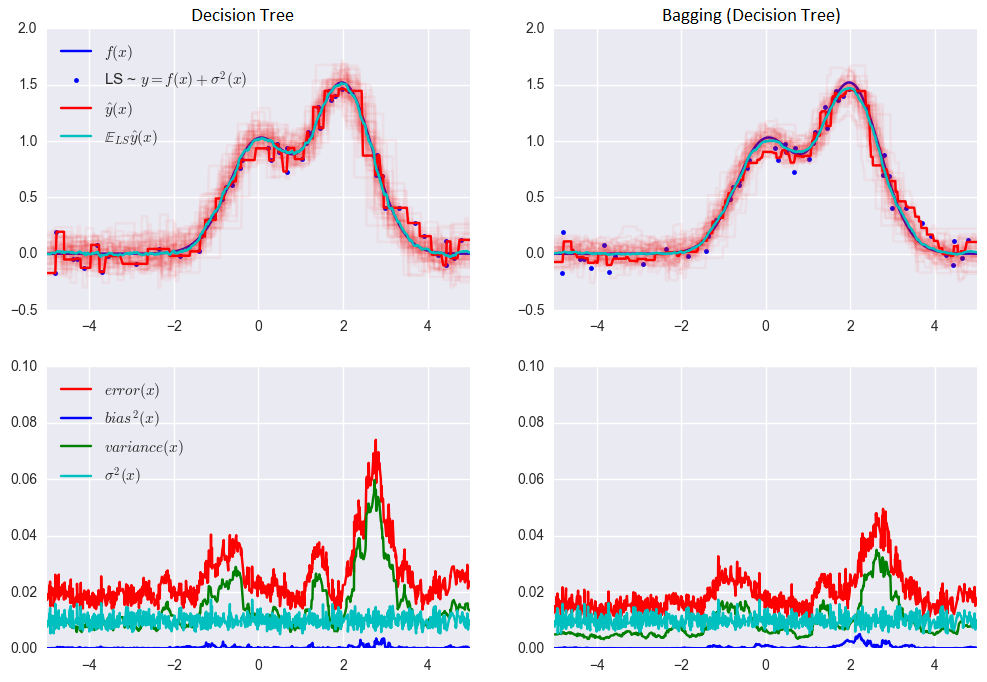

In [ ]:
from IPython.display import Image
Image('img/tree_vs_bagging_eng.png')  #, width=640, height=480)

Помилка дерева рішень
$$ \large 0.0255 (Err) = 0.0003 (Bias^2)  + 0.0152 (Var) + 0.0098 (\sigma^2) $$
Помилка бегінга
$$ \large 0.0196 (Err) = 0.0004 (Bias^2)  + 0.0092 (Var) + 0.0098 (\sigma^2) $$

З графіку і вищенаведених результатів видно, що помилка дисперсії набагато менше в бегінга, як це і було доведено вище.

Бегінг ефективний на малих вибірках, коли виняток навіть малої частини навчальних об'єктів призводить до побудови істотно різних базових класифікаторів. У разі великих вибірок зазвичай генерують підвибірки істотно меншої довжини.

Слід зазначити, що розглянутий нами приклад не дуже придатний для використання на практиці, оскільки ми зробили припущення про некорельованість помилок, що рідко виконується. Якщо це припущення невірне, то зменшення помилки виявляється не таким значним.



### Out-of-bag error

Забігаючи наперед, відзначимо, що при використанні випадкових лісів немає необхідності в крос-валідації або в окремому тестовому наборі, щоб отримати незміщенну оцінку помилки набору тестів. Внутрішню оцінку під час роботи отримують у такий спосіб:

Кожне дерево будується з використанням різних зразків бутстрепа з вихідних даних. Приблизно 37% прикладів залишаються поза вибіркою бутстрепа і не використовується під час побудови k-го дерева.

Це можна легко довести: нехай у вибірці $\large \ell$ об'єктів на кожному кроці всі об'єкти потрапляють у підвибірку з поверненням рівноймовірно, тобто окремий об'єкт — з ймовірністю  $\large\frac{1}{\ell}.$ Ймовірність того, що об'єкт НЕ потрапляє в підвибірку (тобто його не вибрали $\large \ell$ разів): $\large (1 - \frac{1}{\ell})^\ell$. За умов $\large \ell \rightarrow +\infty$ отримуємл один з "чудових" лімітів $\large \frac{1}{e}$. Тоді ймовірність потрапляння конкретного об'єкта в підвибірку $\large \approx  1 - \frac{1}{e} \approx 63\%$.

Давайте розглянемо, як це працює на практиці:

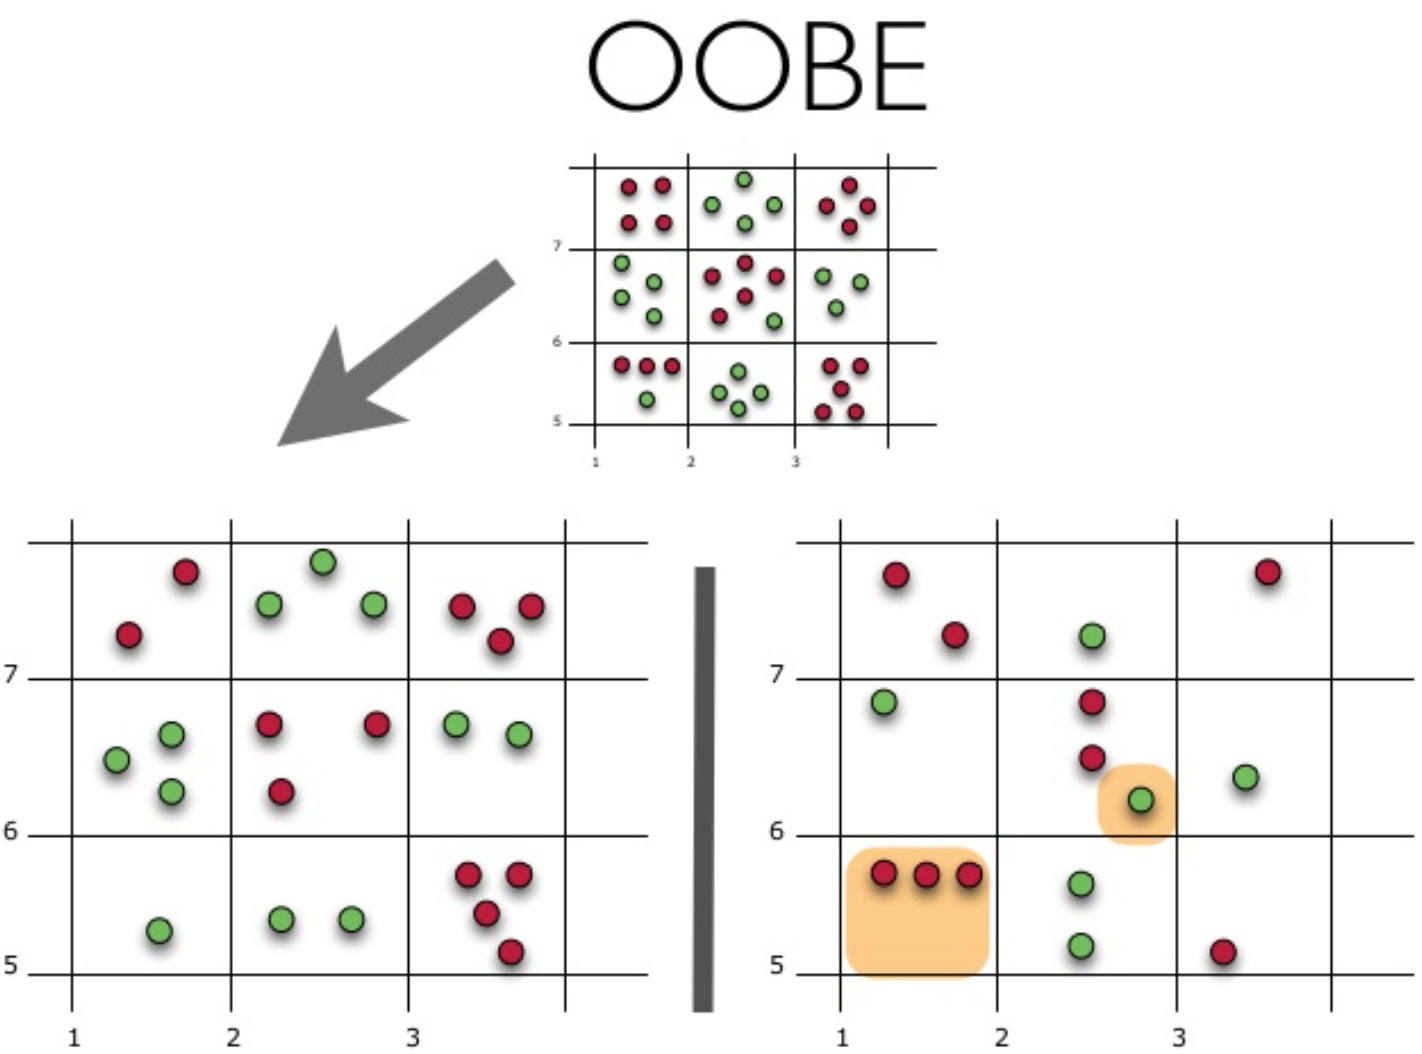

In [ ]:
from IPython.display import Image
Image('img/oob.png')  #, width=640, height=480)

На рисунку видно, що наш класифікатор помилився в 4 спостереженнях, які ми не використовували для тренування. Тоді точність нашого класифікатора дорівнює: $\large \frac{11}{15}*100\% = 73.33\%$

Виходить, що кожний базовий алгоритм навчається на ~63% набору вхідних об'єктів. Тому на решті ~37% його можна відразу перевіряти. Out-of-Bag оцінка — це усереднена оцінка базових алгоритмів на тих ~37% даних, на яких вони не навчалися.

Лео Брейман знайшов застосування бутстрепу не тільки в статистиці, а й в машинному навчанні. Він разом з Адель Катлер удосконалив алгоритм випадкового лісу, який був запропонований [Хо] (http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf), додавши до початкового варіанту побудову некорельованих дерев на основі CART, в поєднанні з методом випадкових підпросторів і беггінга.

Дерева рішень є хорошим сімейством базових класифікаторів для беггінга, оскільки вони досить складні і можуть досягати нульової помилки на будь-якій вибірці. Метод випадкових підпросторів дозволяє знизити корельованості між деревами і уникнути перенавчання. Базові алгоритми навчаються на різних підмножинах ознакового опису, які також виділяються випадковим чином.
Ансамбль моделей, що використовує метод випадкового підпростору, можна побудувати, використовуючи наступний алгоритм:

1. Нехай кількість об'єктів для тренування рівно $\large N$, а кількість ознак $\large D$.
2. Виберіть $\large L$ як кількість окремих моделей в ансамблі.
3. Для кожної окремої моделі $\large l$ виберіть $\large dl (dl < D) $ як кількість ознак для $\large l$ . Як правило, для всіх моделей використовується тільки одне значення $\large dl$.
4. Для кожної окремої моделі $\large l$ створіть навчальну вибірку, обираючи $\large dl$-ознак з $\large D$ з заміною і навчіть модель.

Тепер, щоб застосувати модель ансамблю до нового об'єкту, об'єднайте результати окремих $\large L$ моделей мажоритарним голосуванням або шляхом комбінування апостеріорних ймовірностей.

### Алгоритм

Алгоритм побудови випадкового лісу, що складається з $\large N$ дерев, виглядає наступним чином:
* Для кожного $\large n = 1, \dots,N$:
     * Згенерувати вибірку $\large X_n $ на bootstrap.
     * Побудувати дерево рішень $\large b_n $ за вибіркою $\large X_n $:
         - за заданим критерієм ми вибираємо кращу ознак, робимо розбиття в дереві за нею і так до вичерпання вибірки
         - дерево будується, доки в кожному листку дерева буде не більше $\large n_\text{min}$ об'єктів або поки не досягнемо певної висоти дерева
         - при кожному розбитті спочатку вибирається $\large m$ випадкових ознак з $\large n$ з початкової їх множини,
         і оптимальний розподіл вибірки шукається тільки серед них.
         
Результівний класифікатор $\large a (x) = \frac {1} {N}\sum_{i = 1}^N b_i (x)$, простими словами - для завдання кассіфікації ми вибираємо рішення голосуванням за більшістю, а в задачі регресії - середнім.

Рекомендується в задачах класифікації брати $\large m =\sqrt {n}$, а в задачах регресії - $\large m =\frac {n} {3}$, де $\large n$ - число ознак. Також рекомендується в задачах класифікації будувати кожне дерево до тих пір, доки в кожному листі не виявиться по одному об'єкту, а в задачах регресії - доки в кожному листі не виявиться по п'ять об'єктів.

Таким чином, випадковий ліс - це беггінг над деревами рішень, під час навчання яких для кожного розбиття ознаки вибираються з деякої випадкової підмножини ознак.

### Порівняння з деревом рішень і беггінгом

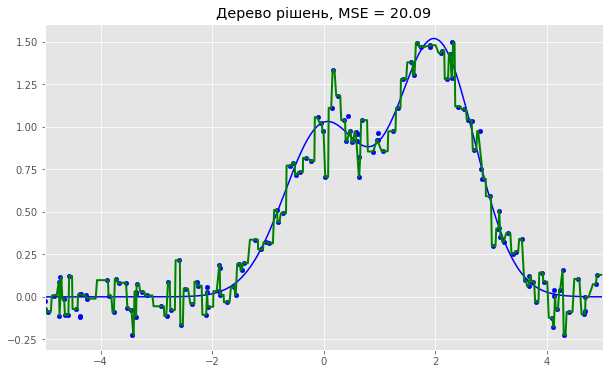

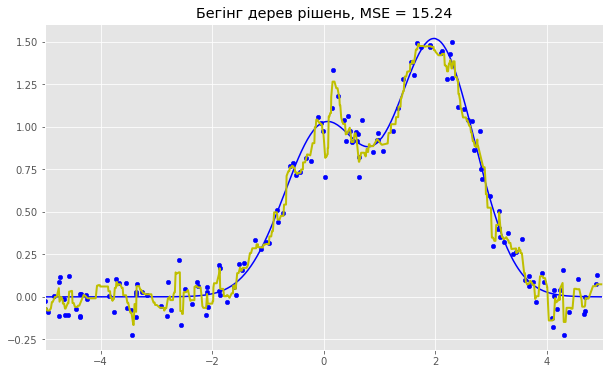

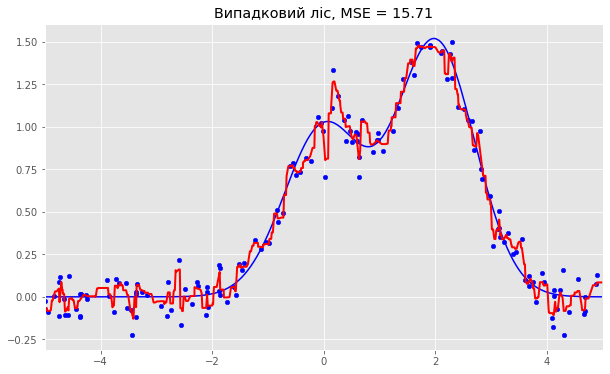

In [ ]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

     
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Дерево рішень, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Бегінг дерев рішень, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Випадковий ліс, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Як ми бачимо з графіків і значень помилки MSE, випадковий ліс з 10 дерев дає кращий результат, ніж одне дерево або беггінг з 10 дерев рішень. Основна відмінність випадкового лісу і беггінга на деревах рішень полягає в тому, що в випадковому лісі з випадкового числа вибирається випадкова підмножина ознак, і найкраща ознака для поділу вузла визначається з підвибірки ознак, на відміну від беггінга, де всі ознаки розглядаються для поділу в вузлі.

Також можна побачити перевагу випадкового лісу і беггінга в задачах класифікації.

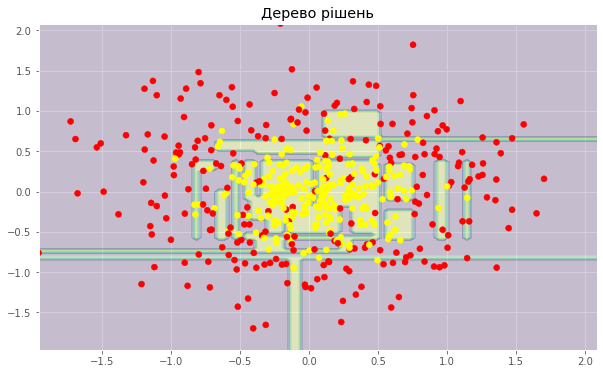

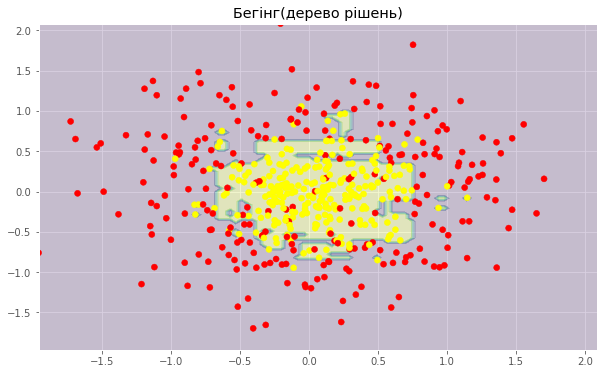

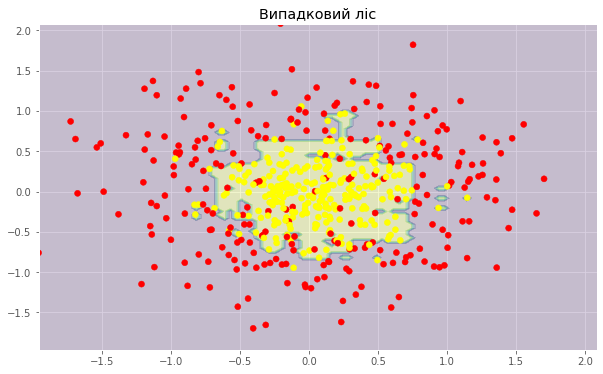

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево рішень")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Бегінг(дерево рішень)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Випадковий ліс")
plt.show()

На малюнках вище видно, що роздільна межа дерева рішень дуже «рвана» і на ній багато гострих кутів, що говорить про перенавчання і слабку узагальнюючу здатність. У той час як у беггінга і випадкового лісу межа досить згладжена і практично немає ознак перенавчання.

Давайте тепер спробуємо розібратися з параметрами, за допомогою підбору яких ми зможемо збільшити частку правильних відповідей.

### Параметри


Метод випадкового лісу реалізований в бібліотеці машинного навчання [scikit-learn] (http://scikit-learn.org/stable/) двома класами RandomForestClassifier і RandomForestRegressor.

Повний список параметрів випадкового лісу для завдання регресії:


```
class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число дерев в "лісі" (за замовчуванням  – 10)
    criterion — функція, яка вимірює якість розбиття гілки дерева (за замовчуванням — "mse" , також можно вибрати "mae")
    max_features — кількість ознак, за якими шукають розбиття. Ви можете вказати конкретне число чи відсоток ознак, або вибрати з доступних значень: "auto" (всі ознаки), "sqrt", "log2". За замовчуванням стоїть "auto".
    max_depth — максимальна глибина дерев  (за замовчуванням глибина не обмежена)
    min_samples_split — мінімальна кількість об'єктів, що необхідна для поділу внутрішнього вузла. Можно задати числом чи відсотком від загальної кількості об'єктів (за замовчуванням — 2)
    min_samples_leaf — мінімальна кількість об'єктів у листку. Можна задати числом чи відсотком від загальної кількості об'єктів (за замовчуванням — 1)
    min_weight_fraction_leaf — мінімальна зважена частка від загальної суми ваг (всіх вхідних об'єктів) повинна бути в листку (за замовчуванням мають однакову вагу)
    max_leaf_nodes — максимальна кількість листків (за замовчуванням немає обмежень)
    min_impurity_split — поріг для зупинки нарощування дерев (за замовчуванням 1е-7)
    bootstrap — чи застосовувати бустреп для побудови дерева (за замовчуванням True)
    oob_score — чи використовувати out-of-bag об'єкти для оцінки R^2 (за замовчуванням False)
    n_jobs — кількість ядер для побудови моделі і прогнозів (за замовчуванням 1, якщо поставити -1, то будуть використовуватися всі ядра)
    random_state — початкове значення для генерації випадкових чисел (за замовчуванням його немає, якщо хочете відтворювані результати, то потрібно вказати будь-яке число типу int
    verbose — виведення логів під час побудови дерева (за замовчуванням 0)
    warm_start — використовує вже натреновану модель і додає дерева в ансамбль (за замовчуванням False)
)

Для задачі класифікації все майже те ж саме, ми приводимо тільки ті параметри, якими RandomForestClassifier відрізняється від RandomForestRegressor 

class sklearn.ensemble.RandomForestClassifier(
    criterion — оскільки в нас тепер задача класифікації, то за замовчуванням вибрано критерій "gini" (можна вибрати "entropy")
    class_weight — вага кожного класу (за замовчуванням всі ваги рівні 1, але можна передати словник з вагами, або явно вказати "balanced", тоді ваги класів будуть рівні їх часткам в генеральній сукупності; також можна вказати "balanced_subsample", тоді ваги на кожній підвибірці будуть змінюватися в залежності від розподілу класів на цій підвибірці.
)```



Далі розглянемо декілька параметрів, на які в першу чергу варто звернути увагу під час побудови моделі:
- n_estimators — кількість дерев в "лесі"
- criterion — критерій для розбиття вибірки у вершині
- max_features — число ознак, за якими шукається розбиття
- min_samples_leaf — мінімальна кількість об'єктів в листку
- max_depth — максимальна глибина дерева

**Розглянемо приклад випадкового лісу в реальній задачі**
Для цього будемо використовувати приклад із завданням fraud detection. Це завдання класифікації, тому будемо використовувати метрику accuracy для оцінки точності. Для початку побудуємо найпростіший класифікатор, який буде нашим бейслайном. Візьмемо тільки числові ознаки для спрощення.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Завантажуємо дані
df = pd.read_csv("data/telecom_churn.csv")

# Обираємо спочатку лише колонки з числовим типом даних
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)
        
# Розділяємо на ознаки і об'єкти
X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

# Ініціалізуємо стратифіковане розбиття нашого датасету для валідації
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ініціалізуємо наш класифікатор з параметрами за замовчуванням
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Навчаємо на тренувальному датасеті
results = cross_val_score(rfc, X, y, cv=skf)

# Оцінюємо точність на тестовому датасеті
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.50%


Отримали точність 92.50%, тепер спробуємо покращити цей результат і подивитися, як поводять себе криві навчання при зміні основних параметрів.

Почнемо з кількості дерев:


In [ ]:
# Ініціалізуємо алгоритм валідації
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Створюємо списки для зберігання точності на тренувальному і тестовому датасеті
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Навчаємо на тренувальному датасеті
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Best accuracy on CV is 92.50% with 100 trees


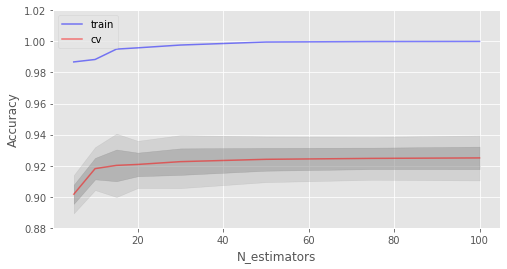

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Як видно з графіків, при посягненні певної кількості дерев, наша точність на тесті виходить на асимптоту, і ви можете самі вирішити, скільки дерев оптимально для вашої задачі. 
На рисунку також видно, шо на тренувальній вибірці ми змогли досягти 100% точності, це вказує нам про перенавчання нашої моделі. Щоб уникнути перенавчання, ми повинні додати параметри регуляризації в модель.

Почнемо з параметра максимальної глибини – `max_depth`. (зафіксуємо кількість дерев, що дорівнює 100)

Best accuracy on CV is 92.44% with 24 max_depth


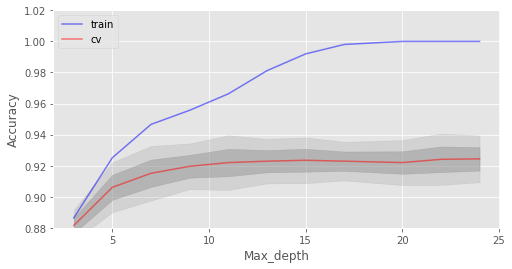

In [ ]:
# Створюємо списки для збереження значень точності на тренувальному і тестовому датасетах
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Навчаємо на тренувальному датасеті
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

Параметр `max_depth` добре справляється з регуляризацією моделі, що дозволяє не так сильно перенавчатися. Точність нашої моделі набагато виросла.

Ще важливий параметр `min_samples_leaf`, він так само виконує функцію регуляризатора.

In [ ]:
# Створюємо списки для збереження значень точності на тренувальному і тестовому датасетах
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Навчаємо на тренувальному датасеті
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 1 min_samples_leaf


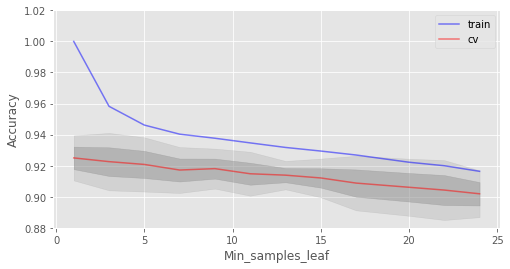

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

В даному випадку ми не виграємо в точності на валідації, проте можемо сильно зменшити перенавчання до 2% при збереженні точності біля 92%.

Розглянемо такий параметр як `max_features`. Для задач класифікації за замовчуванням використовується $\large \sqrt{n}$, де n — число ознак. Давайте перевіримо, чи оптимально в нашому випадку використовувати 4 ознаки чи ні.

Best accuracy on CV is 92.50% with 4 max_features


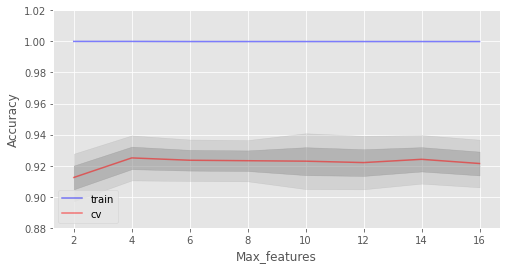

In [ ]:
# Створюємо списки для збереження значень точності на тренувальному і тестовому датасетах
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Навчаємо на тренувальному датасеті
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

В нашому випадку оптимальне число ознак — 10, саме з таким значенням досягається найкращий результат.

Ми розглянули, як поводять себе криві навчання в залежності від зміни основних параметрів. Давайте тепер за допомогою `GridSearch` знайдемо оптимальні параметри для нашого прикладу.


In [ ]:
# Ініціалізуємо параметри, за якими хочемо зробити повний перебір
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=20, max_features=10,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                        warm_start=False), 0.925596661128895)

Краща точність, яку ми змогли досягнути за допомогою перебору параметрів — 92.83% при `'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3`. 

### Варіація і декореляційний ефект

Давайте запишемо варіацію для випадкового лісу як $$ \large Varf(x) = \rho(x)\sigma^2(x) $$
Тут  
- $ \large \rho(x)$ – кореляція вибірки між будь-якими двома деревами, що використовуються під час усереднення 
$$ \large \rho(x) = corr[T(x;\Theta_1(Z)),T(x_2,\Theta_2(Z))], $$ де $ \large \Theta_1(Z) $ и $ \large  \Theta_2(Z) $ – випадково обрана пара дерев на випадково обраних об'єктах вибірки Z
- $ \large \sigma^2(x)$ — це вибіркова дисперсія будь-якого довільно вибраного дерева: $$ \large \sigma^2(x) = VarT(x;\Theta(X))$$

Легко сплутати $ \large \rho(x) $ з середньою кореляцією між навченими деревами в даному випадковому лісі, розглядаючи дерева як N-вектори і обчислюючи середню парну кореляцію між ними. Це не той випадок. Ця умовна кореляція не має прямого відношення до процесу усереднення, а залежність від  $ \large x$  в $ \large \rho(x)$ попереджує нас про цю різницю. Скоріше, $ \large \rho(x)$ є теоретичною кореляцією між парою випадкових дерев, оцінених в об'єкті $ \large x$, яка була викликана багатократним семплюванням тренувальної вибірки з генеральної сукупності $ \large Z $, і після цього вибрана дана пара випадкових дерев. На статистичному жаргоні ця кореляція, викликана вибірковим розподілом $ \large Z $ і $ \large \Theta $.

По факту, умовна кореляція пари дерев рівна 0, тому що бустреп і відбір ознак — незалежні і однаково розподілені.

Якщо розглянути дисперсію по одному дереву, то вона практично не змінюється від змінних для поділу ($ \large m $), а ось для ансамблю це грає велику роль, і дисперсія для дерева набагато вища, ніж для ансамблю.
У книзі *The Elements of Statistical Learning (Trevor Hastie, Robert Tibshirani і Jerome Friedman)* є відмінний приклад, який це демонструє.


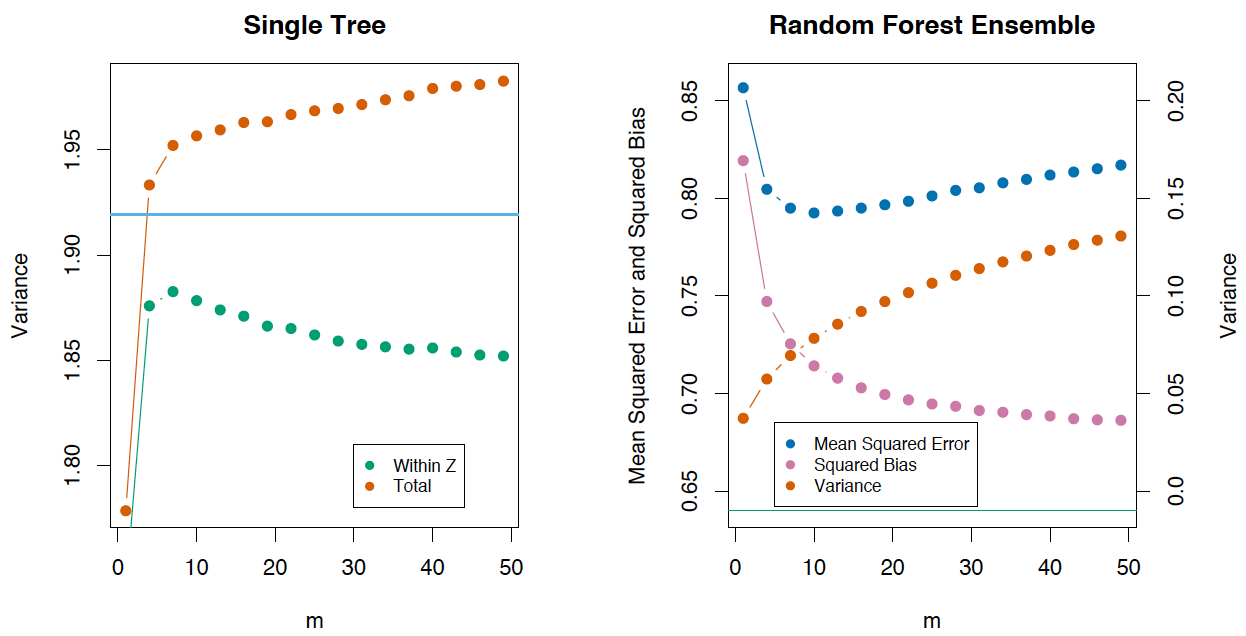

In [ ]:
from IPython.display import Image
Image('img/variance_rf.png') #, width=640, height=480)

### Зміщення

Як і в бегінгу, зміщення у випадковому лісі таке ж, як і сміщення в окремо взятому дереві $ \large T(x,\Theta(Z))$ 
$$ \large \begin{array}{rcl} Bias &=& \mu(x) - E_Zf_{rf}(x) \\
&=& \mu(x) - E_ZE_{\Theta | Z}T(x,\Theta(Z))\end{array}$$
Це також, як правило, більше (в абсолютних величинах), ніж зміщення «неусіченого» (unprunned) дерева, оскільки рандомізація і зменшення простору вибірки накладають обмеження. Відповідно, покращення в прогнозуванні, отримані за допомогою бегінгу чи випадкових лісів, є виключно результатом зменшення дисперсії.

###  Надвипадкові дерева

В надвипадкових деревах (Extremely Randomized Trees) більше випадковості в тому, як обчислюються поділи у вузлах. Як і в випадкових лісах, використовується випадкова підмножина можливих ознак, але замість пошуку найбільш оптимальних порогів, порогові значення довільно вибираються для кожної можливої ознаки, і найкращим з цих випадково генерованих порогів обирається як краще правило для розділення вузла. Це, як правило, дозволяє дещо зменшити дисперсію моделі за рахунок дещо більшого збільшення зміщення.

В бібліотеці scikit-learn є реалізація [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) и [ExtraTreesRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor). Даний метод варто використати, коли проявляється сильне перенавчання на випадковому лісі чи градієнтному бустінгу. 

### Схожість випадкового лісу з алгоритмом k-найближчих сусідів**

Метод випадкового лісу схожий з методом найближчих сусідів. Випадкові лісу, по суті, здійснюють передбачення для об'єктів на основі міток схожих об'єктів з навчання. Схожість об'єктів при цьому тим вище, чим частіше ці об'єкти виявляються в одному і тому ж листку дерева. Покажемо це формально.

Розглянемо задачу регресії з квадратичною функцією втрат. Нехай $\large T_n(x)$ - номер листка n-го дерева з випадкового лісу, в який потрапляє об'єкт $\large x$. Відповідь об'єкта $\large x$ дорівнює середній відповіді за всіма об'єктами навчальної вибірки, які потрапили в цей листок $\large T_n(x)$. Це можна записати так
$$\large b_n(x) = \sum_{i = 1}^{l}w_n(x, x_i)y_i,$$
де $$ \large w_n (x, x_i) = \frac{[T_n (x) = T_n (x_i)]} {\ sum_ {j = 1}^{l} [T_n (x) = T_n (x_j)] }$$
Тоді відповідь композиції дорівнює  $$ \large \begin{array}{rcl} a_n(x) &=& \frac{1}{N}\sum_{n=1}^{N}\sum_{i=1}^{l}w_n(x,x_i)y_i \\
&=& \sum_{i=1}^{l}\Big(\frac{1}{N}\sum_{j=1}^{N}w_n(x,x_j)\Big)y_i \end{array}$$
Видно, що відповідь випадкового лісу є сумою відповідей всіх об'єктів навчання з деякими вагами. Відзначимо, що номер листа $\large T_n (x)$, в який потрапив об'єкт, сам по собі є цінною ознакою. Досить непогано працює підхід, в якому за вибіркою навчається композиція з невеликого числа дерев за допомогою випадкового лісу або градієнтного бустінга, а потім до неї додаються категоріальні ознаки  $ \large T_1(x), \dots, T_n(x) $ . Нові ознаки є результатом нелінійного розбиття простору і несуть в собі інформацію про подібність об'єктів.

Все в тій же книзі *The Elements of Statistical Learning* є хороший наочний приклад подібності випадкового лісу і k-найближчих сусідів.

Розглянемо задачу регресії з квадратичною функцією втрат. Нехай $ \large T_n(x) $ — номер листка n-го дерева з випадкового лісу, в який потрапляєт об'єкт $\large x $. Відповідь об'єкта $ \large x $ рівна середній відповіді за всіма об'єктами навчальної вибірки, які потрапили в цей же лист $ \large T_n(x) $. Це можна записати так 
$$ \large b_n(x) = \sum_{i=1}^{l}w_n(x,x_i)y_i,$$ 
де $$ \large w_n(x, x_i) = \frac{[T_n(x) = T_n(x_i)]}{\sum_{j=1}^{l}[T_n(x) = T_n(x_j)]}$$
Тоді відповідь композиції рівна $$ \large \begin{array}{rcl} a_n(x) &=& \frac{1}{N}\sum_{n=1}^{N}\sum_{i=1}^{l}w_n(x,x_i)y_i \\
&=& \sum_{i=1}^{l}\Big(\frac{1}{N}\sum_{j=1}^{N}w_n(x,x_j)\Big)y_i \end{array}$$
Видно, що відповідь випадкового лісу представляє собою суму відповідей всіх об'єктів навчання з деякими вагами. Відмітимо, що номер листка $ \large T_n(x)$, в який потрапив об'єкт, сам по собі є цінною ознакою. Достатньо непогано працює підхід, в якому за вибіркою навчається композиція з невеликої кільккості дерев за допомогою випадкового лісу чи градієнтного бустінга, а потім до неї додаються категоріальні ознаки  $ \large T_1(x), \dots, T_n(x) $ . Нові ознаки є результатом нелінійного розбиття простору і несе в собі інформацію про схожість об'єктів.

В тій же книзі *The Elements of Statistical Learning* є гарний наглядний приклад схожості випадкового лісу і k-найближчих сусідів. 



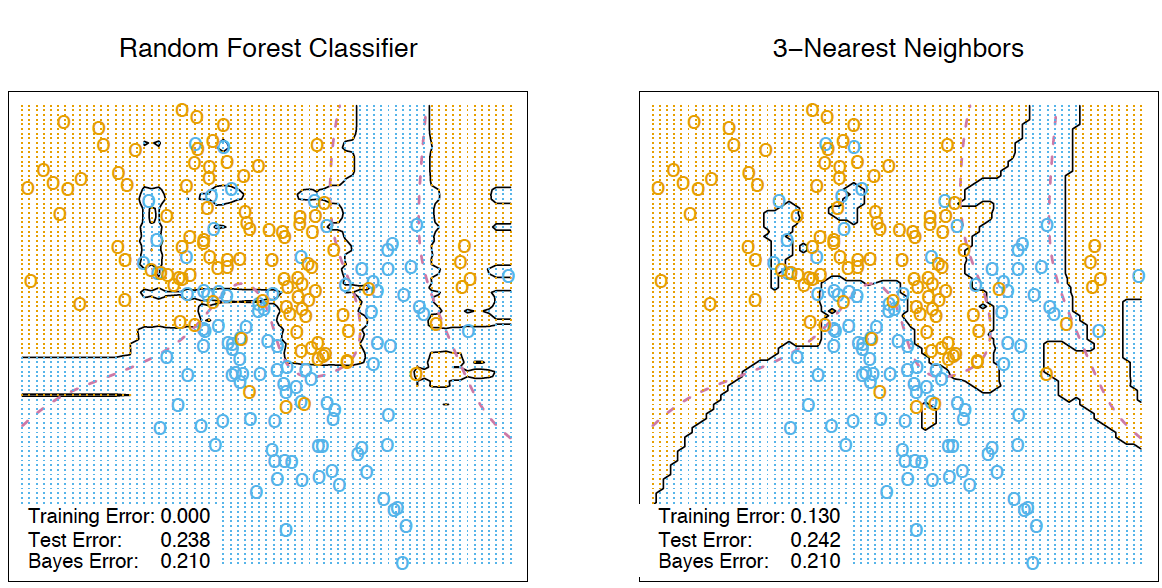

In [ ]:
from IPython.display import Image
Image('img/knn_vs_rf.png') #, width=640, height=480)



### Перетворення ознак в багатовимірний простір
Всі звикли використовувати випадковий ліс для задач навчання з учителем, але також є можливість проводити навчання і без вчителя. За допомогою методу [RandomTreesEmbedding] (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html#sklearn.ensemble.RandomTreesEmbedding) ми можемо зробити трансформацію нашого датасета в багатовимірне розріджене його подання. Його суть в тому, що ми будуємо абсолютно випадкові дерева, і індекс листка, в якому опинилося спостереження, ми вважаємо за нову ознаку. Якщо в перший листок потрапив об'єкт, то ми ставимо 1, а якщо не потрапив, то 0. Так зване бінарне кодування. Контролювати кількість змінних і також ступінь розрідженості нашого нового подання датасету ми можемо збільшуючи / зменшуючи кількість дерев і їх глибини. Оскільки сусідні точки даних, швидше за все, лежать в одному і тому ж листку дерева, перетворення виконує неявну, непараметричних оцінку щільності.

**Плюси**:
 - має високу точність передбачення, на більшості завдань буде краще лінійних алгоритмів; точність порівнянна з точністю бустінга
 - практично не чутливий до викидів в даних через випадкове семлювання
 - нечутливий до масштабування (і взагалі до будь-яких монотонних перетворень) значень ознак, пов'язане з вибором випадкових підпросторів
 - не вимагає ретельної настройки параметрів, добре працює «з коробки». За допомогою «тюнінгу» параметрів можна досягти приросту від 0.5 до 3% точності в залежності від завдання і даних
 - здатний ефективно обробляти дані з великим числом ознак і класів
 - однаково добре обробляє як безперервні, так і дискретні ознаки
 - рідко перенавчається, на практиці додавання дерев майже завжди тільки покращує композицію, але на валідації, після досягнення певної кількості дерев, крива навчання виходить на асимптоту
 - для випадкового лісу існують методи оцінювання значущості окремих ознак в моделі
 - добре працює з пропущеними даними; зберігає хорошу точність, якщо більша частина даних пропущені
 - передбачає можливість балансування ваг кожного класу на всій вибірці, або на підвибірці кожного дерева
 - обчислює близькість між парами об'єктів, які можуть використовуватися під час кластеризації, виявлення викидів або (шляхом масштабування) дають цікаві подання даних
 - можливості, описані вище, можуть бути розширені до немаркованих даних, що приводить до можливості робити кластеризацію і візуалізацію даних, виявляти викиди
 - висока розпаралелюваність і масштабованість.
 
**Мінуси**:
 - на відміну від одного дерева, результати випадкового лісу складніше інтерпретувати
 - немає формальних висновків (p-values), доступних для оцінки важливості змінних
 - алгоритм працює гірше багатьох лінійних методів, коли у вибірці дуже багато розріджених ознак (тексти, Bag of words)
 - випадковий ліс не вміє екстраполювати, на відміну від тієї ж лінійної регресії (але це можна вважати і плюсом, тому що не буде екстремальних значень в разі потрапляння викиду)
 - алгоритм схильний до перенавчання на деяких завданнях, особливо на зашумлених даних
 - для даних, що включають категоріальні змінні з різною кількістю рівнів, випадкові лісу упереджені на користь ознак з великою кількістю рівнів: коли у ознаки багато рівнів, дерево буде сильніше підлаштовуватися саме під ці ознаки, так як на них можна отримати більш високу точність
 - якщо дані містять групи корельованих ознак, що мають схожу значимість для міток, то перевага віддається невеликим групам перед великими
 - великий розмір отримуваних моделей. Потрібно $O(NK)$ пам'яті для зберігання моделі, де $K$ - число дерев.

**Корисні джерела:**
- 15 розділ книги “[Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)” Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie
- більше про практичне застосування випадкового лісу та інших алгоритмів композиції в офіційній документації [scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

### Важливість ознак

Дуже часто ви хочете зрозуміти свій алгоритм, чому він саме так, а не інакше дав чітку відповідь. Або якщо не зрозуміти його повністю, то хоча б які змінні чинять найбільш суттєвий вплив на результат. З випадкового лісу можна досить просто отримати дану інформацію.


### Суть методу

За рисунок нижче інтуїтивно зрозуміло, що важливість ознаки «Вік» в завданні кредитного скорингу вища, ніж важливість ознаки «Дохід». Формалізується це за допомогою поняття приросту інформації.

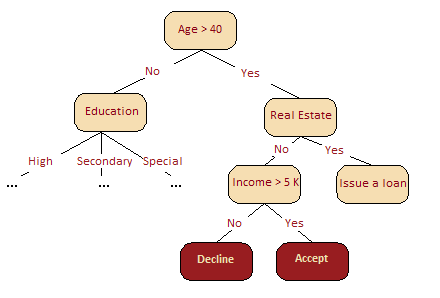

In [ ]:
from IPython.display import Image
Image('img/credit_scoring_toy_tree_english.png') #, width=640, height=480)

Якщо побудувати багато дерев рішень (випадковий ліс), то чим вище в середньому ознака в дереві рішень, тим вона важливіша в даному завданні класифікації / регресії. При кожному розбитті в кожному дереві поліпшення критерію поділу (в нашому випадку коефіцієнт Джині) - це показник важливості, пов'язаний зі змінною поділу, і накопичується він по всім деревам лісу окремо для кожної змінної.

Давайте трохи заглибимося в деталі. Середнє зниження точності, що викликане змінною, визначається під час фази обчислення out-of-bag помилки. Чим більше зменшується точність прогнозів через виключення (або перестановки) однієї змінної, тим важливіша ця змінна, і тому змінні з великим середнім зменшенням точності важливіші для класифікації даних. Середнє зменшення коефіцієнта Джині (або помилки mse в задачах регресії) є мірою того, як кожна змінна сприяє однорідності вузлів і листя в остаточній моделі випадкового лісу. Кожен раз, коли окрема змінна використовується для розбиття вузла, коефіцієнт Джині для дочірніх вузлів розраховується і порівнюється з коефіцієнтом вихідного вузла. Коефіцієнт Джині є мірою однорідності від 0 (однорідної) до 1 (гетерогенної). Зміни в значенні критерію поділу підсумовуються для кожної змінної і нормуються в кінці обчислення. Змінні, які приводять до вузлів з більш високою чистотою, мають більше зниження коефіцієнта Джині.

А тепер подамо все вищеперелічене у вигляді формул. 
$$ \large VI^{T} = \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_i^{T}\Big)}{\Big |\mathfrak{B}^T\Big |} - \frac{\sum_{i \in \mathfrak{B}^T}I \Big(y_i=\hat{y}_{i,\pi_j}^{T}\Big)}{\Big |\mathfrak{B}^T\Big |} $$

$ \large \hat{y}_i^{(T)} = f^{T}(x_i)  $ — прогнозування класу перед перестановкою/видаленням ознаки
$ \large \hat{y}_{i,\pi_j}^{(T)} = f^{T}(x_{i,\pi_j})   $ — прогнозування класу після перестановки/видалення ознаки
$ \large x_{i,\pi_j} = (x_{i,1}, \dots , x_{i,j-1}, \quad x_{\pi_j(i),j}, \quad x_{i,j+1}, \dots , x_{i,p})$
Відмітимо, що $ \large VI^{(T)}(x_j) = 0 $, якщо $ \large X_j $  не знаходиться в дереві $ \large T $ 

Розрахунок важливості ознак в ансамблі:
— ненормовані 
$$ \large VI(x_j) = \frac{\sum_{T=1}^{N}VI^{T}(x_j)}{N} $$

— нормовані 
$$ \large z_j = \frac{VI(x_j)}{\frac{\hat{\sigma}}{\sqrt{N}}} $$
**Приклад.**

Розглянемо результати анкетування відвідувачів хостелів з сайтів Booking.com и TripAdvisor.com. Ознаки — середні оцінки за різними факторами (перелічені нижче) — персонал, стан кімнат і т.д. Цільова ознака — рейтинг хостелу на сайті.


In [ ]:
from __future__ import division, print_function
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Feature ranking:
1. Персонал 0.183150 
2. Ціна/якість 0.147704 
3. Стан спільного простору 0.128188 
4. Додаткові послуги 0.116819 
5. ССЦ 0.105748 
6. Спільні умови і зручності 0.088730 
7. Стан спільної кухні 0.074776 
8. Заїзд в хостел і виїзд з хостела 0.061881 
9. Бронювання хостела  0.053899 
10. Стан кімнати 0.039105 


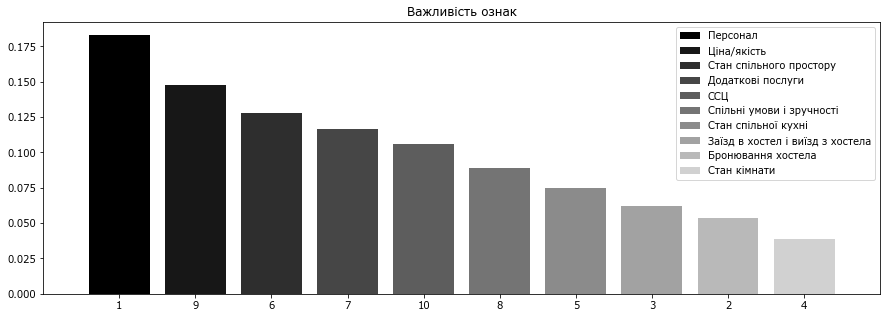

In [ ]:
hostel_data = pd.read_csv("data/hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронювання хостела ",
"f3":u"Заїзд в хостел і виїзд з хостела",
"f4":u"Стан кімнати",
"f5":u"Стан спільної кухні",
"f6":u"Стан спільного простору",
"f7":u"Додаткові послуги",
"f8":u"Спільні умови і зручності",
"f9":u"Ціна/якість",
"f10":u"ССЦ"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важливість ознак")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);

Feature ranking:
1. Персонал 0.182757 
2. Ціна/якість 0.148373 
3. Стан спільного простору 0.128296 
4. Додаткові послуги 0.116604 
5. ССЦ 0.106668 
6. Спільні умови і зручності 0.088589 
7. Стан спільної кухні 0.074273 
8. Заїзд в хостел і виїзд з хостела 0.061521 
9. Бронювання хостела  0.053615 
10. Стан кімнати 0.039305 

На рисунку вище видно, що люди найбільше звертають увагу на персонал і співвідношення ціна / якість і на основі враження від даних речей пишуть свої відгуки. Але різниця між цими ознаками і менш впливовими ознаками не надто значна, і викидання якоїсь ознаки призведе до зменшення точності нашої моделі. Але навіть на основі нашого аналізу ми можемо дати рекомендації готелям в першу чергу краще готувати персонал і / або поліпшити якість до заявленої ціни.